1
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
height: 720
width: 1280
2
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
height: 720
width: 1280
3
[[255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
height: 720
width: 1280
4
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
height: 720
width: 1280
5
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255

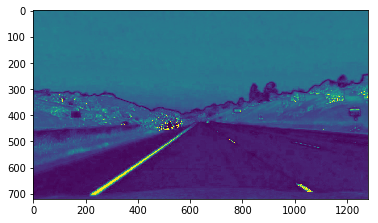

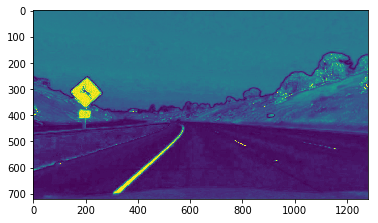

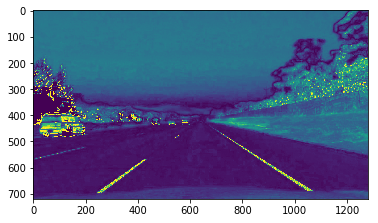

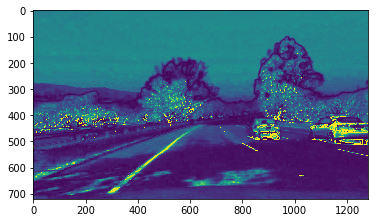

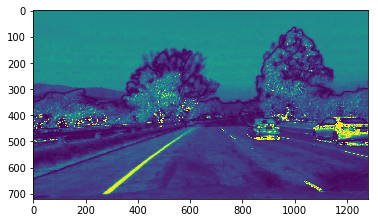

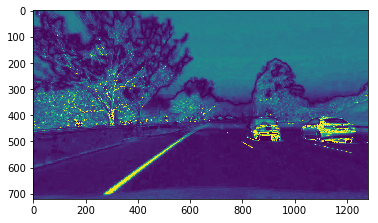

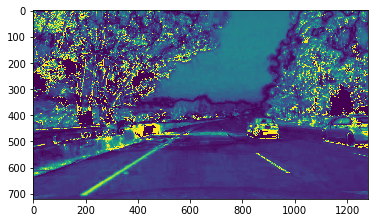

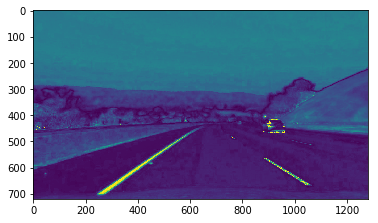

In [1]:
# Run this cell to generate output images from test images as input

import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
# Return camera calibration parameters from given object points, image points, and image shape
ret_cal, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Undistort one of the calibration images
cal_dist = cv2.imread('../CarND-Advanced-Lane-Lines/camera_cal/calibration2.jpg')
cal_undist = cv2.undistort(cal_dist, mtx, dist, None, mtx)
path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_calibration2_undistorted.jpg')
cv2.imwrite(path, cal_undist)

# Read in test images to undistort
dist_images = glob.glob('../CarND-Advanced-Lane-Lines/test_images/*.jpg')

# Undistort test images and save to output_images folder
img_count = 1
for fname in dist_images:
    dist_img = cv2.imread(fname)
    undist = cv2.undistort(dist_img, mtx, dist, None, mtx)
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_undist_' + str(img_count) + '.jpg')
    cv2.imwrite(path, undist)
    img_count = img_count + 1
    
# Read in undistorted output images to convert to HLS color space
rgb_images = sorted(glob.glob('../CarND-Advanced-Lane-Lines/output_images/_undist_*.jpg'))

# Convert undistorted RGB images to HLS color space and use binary threshold
img_count = 1
s_thresh_min = 80
s_thresh_max = 255
for fname in rgb_images:
    rgb_img = cv2.imread(fname)
    hls_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HLS)
    s_channel = hls_img[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_hls_binary_' + str(img_count) + '.jpg')
    cv2.imwrite(path, s_binary)
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_hls_binary255_' + str(img_count) + '.jpg')
    s_binary255 = s_binary*255
    cv2.imwrite(path, s_binary255)
    plt.figure()
    plt.imshow(s_channel)
    print(img_count)
    print(s_binary255)
    print('height: ' + str(s_binary255.shape[0]))
    print('width: ' + str(s_binary255.shape[1]))
    img_count = img_count + 1
    
# Convert undistorted RGB images to grayscale and use binary threshold on Sobel x image
img_count = 1
sx_thresh_min = 50
sx_thresh_max = 255
for fname in rgb_images:
    rgb_img = cv2.imread(fname)
    gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sx_binary = np.zeros_like(scaled_sobelx)
    sx_binary[(scaled_sobelx > sx_thresh_min) & (scaled_sobelx <= sx_thresh_max)] = 1
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_sx_binary_' + str(img_count) + '.jpg')
    cv2.imwrite(path, sx_binary)
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_sx_binary255_' + str(img_count) + '.jpg')
    sx_binary255 = sx_binary*255
    cv2.imwrite(path, sx_binary255)
    img_count = img_count + 1

# Convert undistorted RGB images to grayscale and use binary threshold on Sobel y image
img_count = 1
sy_thresh_min = 50
sy_thresh_max = 255
for fname in rgb_images:
    rgb_img = cv2.imread(fname)
    gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobely = np.absolute(sobely)
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
    sy_binary = np.zeros_like(scaled_sobely)
    sy_binary[(scaled_sobely > sy_thresh_min) & (scaled_sobely <= sy_thresh_max)] = 1
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_sy_binary_' + str(img_count) + '.jpg')
    cv2.imwrite(path, sy_binary)
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_sy_binary255_' + str(img_count) + '.jpg')
    sy_binary255 = sy_binary*255
    cv2.imwrite(path, sy_binary255)
    img_count = img_count + 1
    
# Combine binary thresholds for HLS, Sobel x, and Sobel y images
img_count = 1
s_binary_images = sorted(glob.glob('../CarND-Advanced-Lane-Lines/output_images/_hls_binary_*.jpg'))

for fname in s_binary_images:
    s_binary_img = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_hls_binary_' + str(img_count) + '.jpg')
    sx_binary_img = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_sx_binary_' + str(img_count) + '.jpg')
    sy_binary_img = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_sy_binary_' + str(img_count) + '.jpg')
    combined_binary = np.zeros_like(s_binary_img)
    combined_binary[(s_binary_img == 1) | (sx_binary_img == 1) | (sy_binary_img == 1)] = 255
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_combined_binary255_' + str(img_count) + '.jpg')
    cv2.imwrite(path, combined_binary)
    img_count = img_count + 1
    
# Apply region mask between lane lines, perform perspective transform, and apply region mask at hood of car
img_count = 1
com_binary_images = sorted(glob.glob('../CarND-Advanced-Lane-Lines/output_images/_combined_binary255_*.jpg'))

for fname in com_binary_images:
    com_binary_img = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_combined_binary255_' + str(img_count) + '.jpg')
    
    # Apply a triangular region mask to remove noise from between lane lines on image without perspective transform
    image_mask = np.copy(com_binary_img)
    left_bottom = [300, com_binary_img.shape[0]]
    right_bottom = [1040, com_binary_img.shape[0]]
    apex = [650, 425]
    fit_left_mask = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right_mask = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom_mask = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
    XX, YY = np.meshgrid(np.arange(0, com_binary_img.shape[1]), np.arange(0, com_binary_img.shape[0]))
    region_thresh = (YY > (XX*fit_left_mask[0] + fit_left_mask[1])) & (YY > (XX*fit_right_mask[0] + fit_right_mask[1])) & (YY < (XX*fit_bottom_mask[0] + fit_bottom_mask[1]))
    image_mask[region_thresh] = [0,0,0]
    
    # Define source and destination points to apply perspective transform
    src = np.float32(
        [[200, com_binary_img.shape[0]],
         [1060, com_binary_img.shape[0]],
         [752, 500], # 690, 450
         [520, 500]]) # 594, 450
    dst = np.float32(
        [[200, com_binary_img.shape[0]],
        [1060, com_binary_img.shape[0]],
        [1060, 0],
        [200, 0]])
    M = cv2.getPerspectiveTransform(src, dst)
    top_down = cv2.warpPerspective(image_mask, M, (com_binary_img.shape[1], com_binary_img.shape[0]), flags=cv2.INTER_LINEAR)

    # Apply rectangular region mask to bottom of image where car hood exposed by Sobel y
    top_down[680:,:] = 0
    
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_warp_binary255_' + str(img_count) + '.jpg')
    cv2.imwrite(path, top_down)
    img_count = img_count + 1

# Generate histograms, apply sliding window algorithm, and find polynomial curve fit to lane lines
img_count = 1
top_down_images = sorted(glob.glob('../CarND-Advanced-Lane-Lines/output_images/_warp_binary255_*.jpg'))

for fname in top_down_images:
    top_down_img = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_warp_binary255_' + str(img_count) + '.jpg')
    
    # Generate histogram from bottom portion of image
    bottom_img = top_down_img[top_down_img.shape[0]//2:,:]
    histogram = np.sum(bottom_img, axis=0)


    # Apply sliding windows to detect lane lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint], axis=0)[0]
    rightx_base = (np.argmax(histogram[midpoint:], axis=0) + midpoint)[0]

    # Set sliding window hyperparameters
    nwindows = 8
    width_margin = 90
    minpix = 30
    window_height = np.int(top_down_img.shape[0]//nwindows)
    nonzero = top_down_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    left_lane_inds = []
    right_lane_inds = []

    # Step through sliding windows one by one
    for window in range(nwindows):
        # Define window boundaries
        win_y_low = top_down_img.shape[0] - (window+1)*window_height
        win_y_high = top_down_img.shape[0] - window*window_height
        win_xleft_low = leftx_current - width_margin
        win_xleft_high = leftx_current + width_margin
        win_xright_low = rightx_current - width_margin
        win_xright_high = rightx_current + width_margin

        # Identify nonzero pixels within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append good indices to running list
        left_lane_inds = np.append(left_lane_inds, good_left_inds)
        right_lane_inds = np.append(right_lane_inds, good_right_inds)

        # Re-center next window if minimum pixels found in current window
        if (len(good_left_inds) > minpix):
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if (len(good_right_inds) > minpix):
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate arrays of indices
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            pass

        # Extract left and right line pixel positions
        left_lane_inds = left_lane_inds.astype(int)
        right_lane_inds = right_lane_inds.astype(int)
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds]
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

    # Fit a second-order polynomial to left and right side lane data
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y data for polynomial curves
    ploty = np.linspace(0, top_down_img.shape[0]-1, top_down_img.shape[0])
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    # Copy left/right lane line to other lane line in the case that the polynomial value exceeds the width of the image size
    if right_fitx[0] >= top_down_img.shape[1]:
        right_fitx = left_fitx + (right_fitx[650] - left_fitx[650])
        right_fit[0] = left_fit[0]
        right_fit[1] = left_fit[1]
    if left_fitx[0] <= 0:
        left_fitx = right_fitx - (right_fitx[650] - left_fitx[650])
        left_fit[0] = right_fit[0]
        left_fit[1] = right_fit[1]

    # Plot polynomial curve fit and save image
    plt.figure()
    plt.imshow(top_down_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.savefig('../CarND-Advanced-Lane-Lines/output_images/_polyfit_' + str(img_count) + '.jpg')
    plt.close()
    
    # Calculate radius of curvature for left lane, right lane, and the maximum of the two
    r_curve_left = (np.sqrt((1 + (2*left_fit[0]*top_down_img.shape[0] + left_fit[1])**2)**3))/(np.absolute(2*left_fit[0]))
    r_curve_right = (np.sqrt((1 + (2*right_fit[0]*top_down_img.shape[0] + right_fit[1])**2)**3))/(np.absolute(2*right_fit[0]))
    r_curve_max = np.max([r_curve_left, r_curve_right])
    
    # Convert units from pixels to meters for parabolic coefficients and radius of curvature
    my = 30/top_down_img.shape[0]
    mx = 3.7/900
    left_fit[0] = (mx/(my**2))*left_fit[0]
    right_fit[0] = (mx/(my**2))*right_fit[0]
    left_fit[1] = (mx/my)*left_fit[1]
    right_fit[1] = (mx/my)*right_fit[1]
    rm_curve_left = (np.sqrt((1 + (2*left_fit[0]*top_down_img.shape[0] + left_fit[1])**2)**3))/(np.absolute(2*left_fit[0]))
    rm_curve_right = (np.sqrt((1 + (2*right_fit[0]*top_down_img.shape[0] + right_fit[1])**2)**3))/(np.absolute(2*right_fit[0]))
    rm_curve_mean = np.int(np.round(np.mean([rm_curve_left, rm_curve_right])))
    
    # Calculate vehicle distance from center of lane
    vehicle_center_rel = (left_fitx[top_down_img.shape[0]-1] + right_fitx[top_down_img.shape[0]-1])/2
    center_offset = (top_down_img.shape[1]/2 - vehicle_center_rel)*mx
    if center_offset >= 0:
        offset_dir = 'right'
    if center_offset < 0:
        offset_dir = 'left'
    abs_center_offset = np.round(np.absolute(center_offset), 2)
    
    # Calculate inverse perspective transform, fill lane with color, then apply inverse perspective transform
    com_binary_img = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_combined_binary255_' + str(img_count) + '.jpg')
    com_rgb_img = cv2.cvtColor(com_binary_img, cv2.COLOR_HLS2RGB)
    
    # Define source and destination points to apply perspective transform
    src = np.float32(
        [[200, com_rgb_img.shape[0]],
         [1060, com_rgb_img.shape[0]],
         [752, 500], # 690, 450
         [520, 500]]) # 594, 450
    dst = np.float32(
        [[200, com_rgb_img.shape[0]],
        [1060, com_rgb_img.shape[0]],
        [1060, 0],
        [200, 0]])
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    rgb_poly = np.zeros_like(com_rgb_img)
    for px in range(0,rgb_poly.shape[1]-1):
        for py in range(0,rgb_poly.shape[0]-1):
            if (px >= left_fitx[py]) & (px <= right_fitx[py]):
                rgb_poly[py,px] = [0,255,0]
    
    rgb_poly_dist = cv2.warpPerspective(rgb_poly, Minv, (rgb_poly.shape[1], rgb_poly.shape[0]), flags=cv2.INTER_LINEAR)
    
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_green_poly_' + str(img_count) + '.jpg')
    cv2.imwrite(path, rgb_poly_dist)
    undist = cv2.imread('../CarND-Advanced-Lane-Lines/output_images/_undist_' + str(img_count) + '.jpg')
    overlay = cv2.addWeighted(undist, 1.0, rgb_poly_dist, 0.25, 0)
    overlay_rad = cv2.putText(overlay, 'Radius of Curvature = ' + str(rm_curve_mean) + 'm', (20,50), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
    overlay_final = cv2.putText(overlay_rad, 'Vehicle is ' + str(abs_center_offset) + 'm ' + offset_dir + ' of center', (20,100), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
    
    path = os.path.join('../CarND-Advanced-Lane-Lines/output_images','_final_image_' + str(img_count) + '.jpg')
    cv2.imwrite(path, overlay_final)
    
    img_count = img_count + 1

In [1]:
# Run this cell to generate output video from project video input

import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

def changeColorToSaturationAndBinary(udst_image):
    
    s_thresh_min = 80
    s_thresh_max = 255
    hls_img = cv2.cvtColor(udst_image, cv2.COLOR_BGR2HLS)
    s_channel = hls_img[:,:,2]
    s_binary = np.zeros_like(udst_image)
    s_binary[:,:,0] = s_channel
    s_binary[:,:,1] = s_channel
    s_binary[:,:,2] = s_channel
    s_binary[(s_channel > s_thresh_min) & (s_channel <= s_thresh_max)] = 255
    
    return s_binary

def sobelxAndBinary(udst_image):
    
    sx_thresh_min = 50
    sx_thresh_max = 255
    gray = cv2.cvtColor(udst_image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sx_binary = np.zeros_like(udst_image)
    sx_binary[(scaled_sobelx > sx_thresh_min) & (scaled_sobelx <= sx_thresh_max)] = [1,1,1]
    
    return sx_binary

def sobelyAndBinary(udst_image):
    
    sy_thresh_min = 50
    sy_thresh_max = 255
    gray = cv2.cvtColor(udst_image, cv2.COLOR_RGB2GRAY)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobely = np.absolute(sobely)
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
    sy_binary = np.zeros_like(udst_image)
    sy_binary[(scaled_sobely > sy_thresh_min) & (scaled_sobely <= sy_thresh_max)] = [1,1,1]
    
    return sy_binary

def combineSaturationSobelxSobely(s_binary, sx_binary, sy_binary):
    
    com_binary = np.zeros_like(s_binary)
    com_binary[(s_binary == 255) | (sx_binary == 1) | (sy_binary == 1)] = 255
    
    return com_binary

def imageMaskWarp(com_binary):
    
    # Apply a triangular region mask to remove noise from between lane lines on image without perspective transform
    image_mask = np.copy(com_binary)
    left_bottom = [300, com_binary.shape[0]]
    right_bottom = [1040, com_binary.shape[0]]
    apex = [650, 425]
    
    fit_left_mask = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right_mask = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom_mask = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
    XX, YY = np.meshgrid(np.arange(0, com_binary.shape[1]), np.arange(0, com_binary.shape[0]))
    region_thresh = (YY > (XX*fit_left_mask[0] + fit_left_mask[1])) & (YY > (XX*fit_right_mask[0] + fit_right_mask[1])) & (YY < (XX*fit_bottom_mask[0] + fit_bottom_mask[1]))
    image_mask[region_thresh] = [0,0,0]
    
    # Define source and destination points to apply perspective transform
    src = np.float32(
        [[200, com_binary.shape[0]],
         [1060, com_binary.shape[0]],
         [752, 500], # 690, 450
         [520, 500]]) # 594, 450
    dst = np.float32(
        [[200, com_binary.shape[0]],
        [1060, com_binary.shape[0]],
        [1060, 0],
        [200, 0]])
    M = cv2.getPerspectiveTransform(src, dst)
    masked_warped_image = cv2.warpPerspective(image_mask, M, (com_binary.shape[1], com_binary.shape[0]), flags=cv2.INTER_LINEAR)

    # Apply rectangular region mask to bottom of image where car hood exposed by Sobel y
    masked_warped_image[680:,:] = 0
    
    return masked_warped_image

def fitQuadratic(masked_warped_image):
    
    # Generate histogram from bottom portion of image
    bottom_img = masked_warped_image[masked_warped_image.shape[0]//2:,:]
    histogram = np.sum(bottom_img, axis=0)

    # Apply sliding windows to detect lane lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint], axis=0)#[0]
    rightx_base = (np.argmax(histogram[midpoint:], axis=0) + midpoint)#[0]

    # Set sliding window hyperparameters
    nwindows = 8
    width_margin = 90
    minpix = 30
    window_height = np.int(masked_warped_image.shape[0]//nwindows)
    nonzero = masked_warped_image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base[0]
    rightx_current = rightx_base[0]
    left_lane_inds = []
    right_lane_inds = []

    # Step through sliding windows one by one
    for window in range(nwindows):
        # Define window boundaries
        win_y_low = masked_warped_image.shape[0] - (window+1)*window_height
        win_y_high = masked_warped_image.shape[0] - window*window_height
        win_xleft_low = leftx_current - width_margin
        win_xleft_high = leftx_current + width_margin
        win_xright_low = rightx_current - width_margin
        win_xright_high = rightx_current + width_margin

        # Identify nonzero pixels within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append good indices to running list
        left_lane_inds = np.append(left_lane_inds, good_left_inds)
        right_lane_inds = np.append(right_lane_inds, good_right_inds)

        # Re-center next window if minimum pixels found in current window
        if (len(good_left_inds) > minpix):
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if (len(good_right_inds) > minpix):
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate arrays of indices
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            pass

        # Extract left and right line pixel positions
        left_lane_inds = left_lane_inds.astype(int)
        right_lane_inds = right_lane_inds.astype(int)
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds]
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

    # Fit a second-order polynomial to left and right side lane data
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y data for polynomial curves
    ploty = np.linspace(0, masked_warped_image.shape[0]-1, masked_warped_image.shape[0])
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    # Copy left/right lane line to other lane line in the case that the polynomial value exceeds the width of the image size
    if right_fitx[0] >= masked_warped_image.shape[1]:
        right_fitx = left_fitx + (right_fitx[650] - left_fitx[650])
        right_fit[0] = left_fit[0]
        right_fit[1] = left_fit[1]
    if left_fitx[0] <= 0:
        left_fitx = right_fitx - (right_fitx[650] - left_fitx[650])
        left_fit[0] = right_fit[0]
        left_fit[1] = right_fit[1]
    
    return left_fit, right_fit, left_fitx, right_fitx

def detectLane(masked_warped_image, com_binary, udst_image, left_fit, right_fit, left_fitx, right_fitx):
    
    # Calculate radius of curvature for left lane, right lane, and the maximum of the two
    r_curve_left = (np.sqrt((1 + (2*left_fit[0]*masked_warped_image.shape[0] + left_fit[1])**2)**3))/(np.absolute(2*left_fit[0]))
    r_curve_right = (np.sqrt((1 + (2*right_fit[0]*masked_warped_image.shape[0] + right_fit[1])**2)**3))/(np.absolute(2*right_fit[0]))
    r_curve_max = np.max([r_curve_left, r_curve_right])
    
    # Convert units from pixels to meters for parabolic coefficients and radius of curvature
    my = 30/masked_warped_image.shape[0]
    mx = 3.7/900
    left_fit[0] = (mx/(my**2))*left_fit[0]
    right_fit[0] = (mx/(my**2))*right_fit[0]
    left_fit[1] = (mx/my)*left_fit[1]
    right_fit[1] = (mx/my)*right_fit[1]
    rm_curve_left = (np.sqrt((1 + (2*left_fit[0]*masked_warped_image.shape[0] + left_fit[1])**2)**3))/(np.absolute(2*left_fit[0]))
    rm_curve_right = (np.sqrt((1 + (2*right_fit[0]*masked_warped_image.shape[0] + right_fit[1])**2)**3))/(np.absolute(2*right_fit[0]))
    rm_curve_mean = np.int(np.round(np.mean([rm_curve_left, rm_curve_right])))
    
    # Calculate vehicle distance from center of lane
    vehicle_center_rel = (left_fitx[masked_warped_image.shape[0]-1] + right_fitx[masked_warped_image.shape[0]-1])/2
    center_offset = (masked_warped_image.shape[1]/2 - vehicle_center_rel)*mx
    if center_offset >= 0:
        offset_dir = 'right'
    if center_offset < 0:
        offset_dir = 'left'
    abs_center_offset = np.round(np.absolute(center_offset), 2)
    
    # Calculate inverse perspective transform, fill lane with color, then apply inverse perspective transform
    com_rgb_img = cv2.cvtColor(com_binary, cv2.COLOR_HLS2RGB)
    
    # Define source and destination points to apply perspective transform
    src = np.float32(
        [[200, com_rgb_img.shape[0]],
         [1060, com_rgb_img.shape[0]],
         [752, 500], # 690, 450
         [520, 500]]) # 594, 450
    dst = np.float32(
        [[200, com_rgb_img.shape[0]],
        [1060, com_rgb_img.shape[0]],
        [1060, 0],
        [200, 0]])
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    rgb_poly = np.zeros_like(com_rgb_img)
    for px in range(0,rgb_poly.shape[1]-1):
        for py in range(0,rgb_poly.shape[0]-1):
            if (px >= left_fitx[py]) & (px <= right_fitx[py]):
                rgb_poly[py,px] = [0,255,0]
    
    rgb_poly_dist = cv2.warpPerspective(rgb_poly, Minv, (rgb_poly.shape[1], rgb_poly.shape[0]), flags=cv2.INTER_LINEAR)
    
    overlay = cv2.addWeighted(udst_image, 1.0, rgb_poly_dist, 0.25, 0)
    overlay_rad = cv2.putText(overlay, 'Radius of Curvature = ' + str(rm_curve_mean) + 'm', (20,50), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
    final_image = cv2.putText(overlay_rad, 'Vehicle is ' + str(abs_center_offset) + 'm ' + offset_dir + ' of center', (20,100), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
    
    return final_image

def process_image(image):
    
    # Undistort original image from camera calibration parameters
    udst_image = cv2.undistort(image, mtx, dist, None, mtx)
    
    # Convert undistorted images from RGB to HLS color space and apply binary threshold
    s_binary = changeColorToSaturationAndBinary(udst_image)
    
    # Convert undistorted images from RGB to greyscale, apply Sobel x gradient, and apply binary threshold
    sx_binary = sobelxAndBinary(udst_image)
    
    # Convert undistorted images from RGB to greyscale, apply Sobel y gradient, and apply binary threshold
    sy_binary = sobelyAndBinary(udst_image)
    
    # Combine binary thresholds from HLS, Sobel x, and Sobel y images
    com_binary = combineSaturationSobelxSobely(s_binary, sx_binary, sy_binary)
    
    # Apply region mask between lane lines, perform perspective transform, and apply region mask at hood of car
    masked_warped_image = imageMaskWarp(com_binary)
    
    # Generate histograms, apply sliding window algorithm, and find polynomial curve fit to lane lines
    left_fit, right_fit, left_fitx, right_fitx = fitQuadratic(masked_warped_image)
    
    # Generate final image with detected lane, radius of curvature, and vehicle center offset
    final_image = detectLane(masked_warped_image, com_binary, udst_image, left_fit, right_fit, left_fitx, right_fitx)
    
    return final_image

# Perform camera calibration using given set of chessboard images
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

# Return camera calibration parameters from given object points, image points, and image shape
ret_cal, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Generate final video output using advanced lane finding pipeline
final_output = '../CarND-Advanced-Lane-Lines/output_images/project_video_output.mp4'
clip = VideoFileClip('../CarND-Advanced-Lane-Lines/project_video.mp4')
final_clip = clip.fl_image(process_image)
%time final_clip.write_videofile(final_output, audio=False)

[MoviePy] >>>> Building video ../CarND-Advanced-Lane-Lines/output_images/project_video_output.mp4
[MoviePy] Writing video ../CarND-Advanced-Lane-Lines/output_images/project_video_output.mp4


100%|█████████▉| 1260/1261 [35:17<00:01,  1.64s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../CarND-Advanced-Lane-Lines/output_images/project_video_output.mp4 

CPU times: user 32min 18s, sys: 50.4 s, total: 33min 8s
Wall time: 35min 20s
